In [80]:
import networkx as nx
import utils 
import pelita as pl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import importlib

importlib.reload(utils)

<module 'utils' from '/Users/florencia/meine/coding/flos_pelita/utils.py'>

In [84]:
layout="""
    ################
    #    1.   .    #
    #              #
    #  ...  ... .  #
    #   ######     #
    #  ...         #
    #    .    ######
    #  ..          #
    #              #
    #  ... ......  #
    #        #     #
    #. 0E E  #     #
    ################
    """

bot = pl.utils.setup_test_game(layout=layout, is_blue=True)

In [132]:
net1 = utils.walls_to_nxgraph(bot.walls)

In [164]:
li = [1,2,45]
li.remove(2)
li

[1, 45]

[(5, 9), (4, 7), (4, 9), (3, 3), (5, 5), (4, 5), (5, 6), (6, 1), (7, 9), (3, 9), (4, 3), (5, 3), (3, 7), (1, 11), (3, 5)]


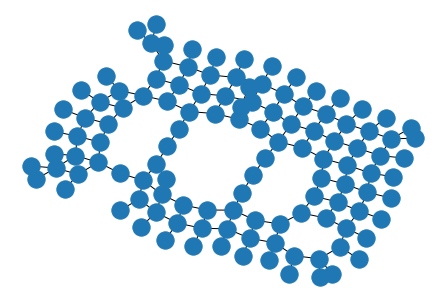

In [86]:
net2 = utils.walls_to_nxgraph(bot.food)
print(bot.food)
nx.draw_kamada_kawai(net2)

In [160]:
def largest_food_cluster(net, bot):

    ## set food attr
    for n in net.nodes:
        if n in bot.food:
            net.node[n]['food'] = True
    
    ## define food network
    food_dict = nx.get_node_attributes(net, 'food')
    foodnet = net.subgraph(food_dict.keys())
    
    ## find largest food cluster
    fnets = list(nx.connected_component_subgraphs(foodnet))
    net_sizes = ([(i, len(thisnet.nodes)) for i, thisnet in enumerate(fnets)])
    largest_food_cluster = max(net_sizes, key=lambda x:x[1])[0]
    coordinates_li = list(fnets[largest_food_cluster].nodes)
    
    return coordinates_li


def shortest_path_to_cluster(coordinates_list, bot, net):
    '''returns path to closest food pellet
    Parameters
    -----------
    coordiates_list: list
    list of the coordinates of the food in a cluster
    bot: Bot object
    net: nx Graph
    graph of the walls
    Return
    ------
    shortest path to cluster
    '''
    food_shp = []
    ## path to food in cluster
    for pos in coordinates_list:
         food_shp.append(nx.shortest_path(net, bot.position, pos))

    ## path length (index, path_len)
    path_len = ([(i, len(path)) for i, path in enumerate(food_shp)])
    shortest_path_2food_ix = min(path_len, key=lambda x:x[1])[0]
    
    return food_shp[shortest_path_2food_ix]

In [161]:
ition

NameError: name 'ition' is not defined

In [162]:
fcl = largest_food_cluster(net1, bot)
closest_target_in_cluster(fcl, bot, net1)

[[(3, 11), (3, 10), (3, 9), (3, 8), (3, 7), (3, 6), (3, 5), (4, 5)], [(3, 11), (3, 10), (3, 9), (3, 8), (3, 7), (3, 6), (3, 5), (4, 5), (5, 5)], [(3, 11), (3, 10), (3, 9), (3, 8), (3, 7), (3, 6), (4, 6), (5, 6)], [(3, 11), (3, 10), (3, 9), (3, 8), (3, 7), (3, 6), (3, 5)]]


[(3, 11), (3, 10), (3, 9), (3, 8), (3, 7), (3, 6), (3, 5)]

In [159]:
bot.position

(3, 11)

(1, 11)
(3, 3)
(3, 5)
(3, 7)
(3, 9)
(4, 3)
(4, 5)
(4, 7)
(4, 9)
(5, 3)
(5, 5)
(5, 6)
(5, 9)
(6, 1)
(7, 9)


In [88]:
net.nodes
nx.get_node_attributes(net, 'food')

{(1, 11): True,
 (3, 3): True,
 (3, 5): True,
 (3, 7): True,
 (3, 9): True,
 (4, 3): True,
 (4, 5): True,
 (4, 7): True,
 (4, 9): True,
 (5, 3): True,
 (5, 5): True,
 (5, 6): True,
 (5, 9): True,
 (6, 1): True,
 (7, 9): True}

/Users/florencia/venvs/pelitaenv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


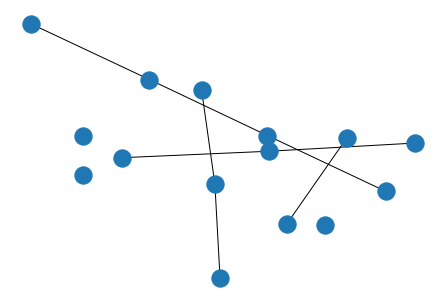

In [121]:
food_dict = nx.get_node_attributes(net, 'food')
n2 = net.subgraph(food_dict.keys())
nx.draw_kamada_kawai(n2)

In [125]:
fnets = list(nx.connected_component_subgraphs(n2))
sub_foodnets = ([(i, len(thisnet.nodes)) for i, thisnet in enumerate(fnets)])
sub_foodnets

[(0, 3), (1, 2), (2, 3), (3, 4), (4, 1), (5, 1), (6, 1)]

/Users/florencia/venvs/pelitaenv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


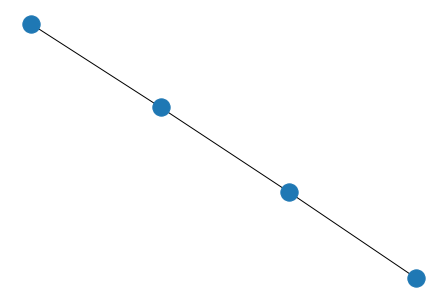

In [126]:

sub_foodnets = ([(i, len(thisnet.nodes)) for i, thisnet in enumerate(fnets)])

largest_food_cluster = max(sub_foodnets, key=lambda x:x[1])[0]

largest_food_net = fnets[largest_food_cluster]

nx.draw_kamada_kawai(largest_food_net)

In [130]:
list(largest_food_net.nodes)

[(4, 5), (5, 5), (5, 6), (3, 5)]

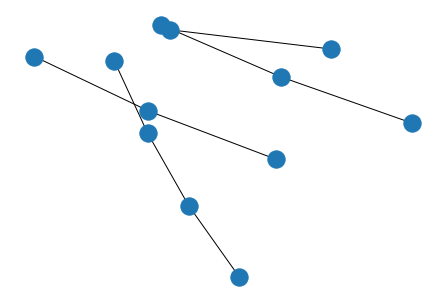

In [89]:
food_net = utils.food_to_nxgraph(bot.food)
nx.draw_kamada_kawai(food_net)

In [115]:
fnets = list(nx.connected_component_subgraphs(food_net))

sub_foodnets = ([(i, len(thisnet.nodes)) for i, thisnet in enumerate(fnets)])

largest_food_cluster = max(sub_foodnets, key=lambda x:x[0])[0]

largest_food_net = fnets[largest_food_cluster]

/Users/florencia/venvs/pelitaenv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


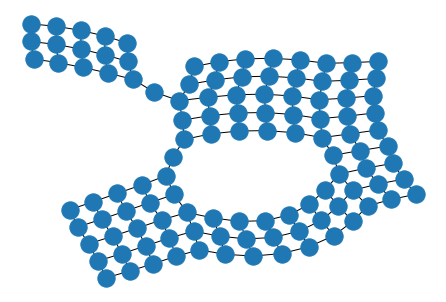

In [47]:
nx.draw_kamada_kawai(net)

In [54]:
net.adjacency()

In [55]:
A = nx.adjacency_matrix(net)

In [58]:

A.todense()

matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

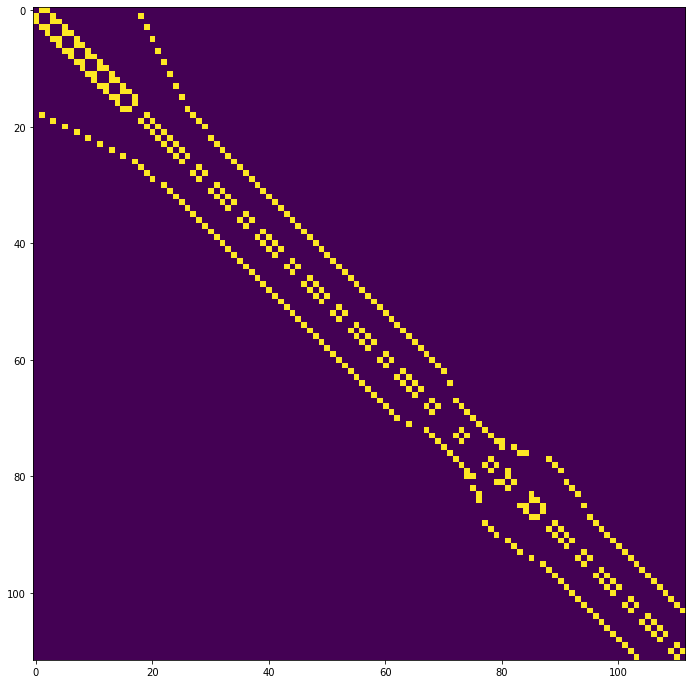

In [60]:
plt.figure(figsize=(12,12))
plt.imshow(A.todense())